In [ ]:
def fix_font():
    # From https://HC.Dle.pw, By Jinseo Kim
    # v1.0.0
    import os
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    os.system("apt-get install -y fonts-nanum")
    os.system("fc-cache -fv")
    mpl.font_manager._rebuild()
    findfont = mpl.font_manager.fontManager.findfont
    mpl.font_manager.findfont = findfont
    mpl.backends.backend_agg.findfont = findfont
    plt.rcParams['font.family'] = "NanumBarunGothic"
    plt.rcParams['axes.unicode_minus'] = False
           
fix_font()

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.4 MB/s eta 0:00:00


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base-v2022")

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/sentiment_kcelectra/감성대화말뭉치_Training.csv')
train_df

,id,text,labels
0,1,일은 왜 해도 해도 끝이 없을까? 화가 난다.,2
1,2,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,2
2,3,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,2
3,4,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,2
4,5,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,2
...,...,...,...
51625,51626,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.,2
51626,51627,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.,3
51627,51628,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.,5
51628,51629,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.,3


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/sentiment_kcelectra/감성대화말뭉치_Test.csv')
test_df

,id,text,labels
0,1,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...,3
1,2,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.,3
2,3,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.,3
3,4,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.,3
4,5,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.,3
...,...,...,...
6636,6637,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,4
6637,6638,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,4
6638,6639,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,4
6639,6640,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,4


In [ ]:
tokenized_train_sentences = tokenizer(
    list(train_df["text"]),
    return_tensors= "pt",        # pytorch의 tensor 형태로 return
    max_length = 128,            # 최대 토큰 길이
    padding = True,              # 제로패팅
    truncation = True,           # 최대 토큰 길이 초과하면 자름
    add_special_tokens = True,   # special token 추가가
)

In [ ]:
print(tokenized_train_sentences[0])
print(tokenized_train_sentences[0].tokens)
print(tokenized_train_sentences[0].ids)
print(tokenized_train_sentences[0].attention_mask)

Encoding(num_tokens=68, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '일은', '왜', '해도', '해도', '끝이', '없을까', '?', '화가', '난다', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
[2, 10327, 2607, 8514, 8514, 12196, 23565, 33, 10406, 10805, 18, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
tokenized_test_sentences = tokenizer(
    list(test_df["text"]),
    return_tensors= "pt",        # pytorch의 tensor 형태로 return
    max_length = 128,            # 최대 토큰 길이
    padding = True,              # 제로패팅
    truncation = True,           # 최대 토큰 길이 초과하면 자름
    add_special_tokens = True,   # special token 추가가
)

In [ ]:
print(tokenized_test_sentences[0])
print(tokenized_test_sentences[0].tokens)
print(tokenized_test_sentences[0].ids)
print(tokenized_test_sentences[0].attention_mask)

Encoding(num_tokens=44, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '이번', '프로젝트', '##에서', '발표', '##를', '하는데', '내가', '실수', '##하는', '바람에', '우리', '팀', '##이', '감점', '##을', '받았', '##어', '.', '너무', '미안해', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
[2, 8183, 27504, 7979, 9716, 4023, 8504, 8241, 11400, 7974, 20786, 7992, 3634, 4012, 48171, 4053, 9667, 4006, 18, 8072, 20001, 18, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key : torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_label = train_df["labels"].values
test_label = test_df["labels"].values

train_dataset = SentimentDataset(tokenized_train_sentences, train_label)
test_dataset = SentimentDataset(tokenized_test_sentences, test_label)

In [ ]:
args = TrainingArguments(
    output_dir='/content/drive/MyDrive/sentiment_kcelectra/',           # 학습결과 저장경로
    num_train_epochs=1,                             # 학습 에포크 설정
    per_device_train_batch_size=64,                 # 학습 배치 사이즈 설정
    per_device_eval_batch_size=64,                  # 테스트 배치 사이즈 설정  
    logging_dir='/content/drive/MyDrive/sentiment_kcelectra/logs',      # 학습 log 저장 경로
    logging_steps=500,                              # 학습 log 기록 단위
    save_total_limit=2,                              # 학습 결과 저장 최대 갯수
    resume_from_checkpoint=True
)   

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [ ]:
# 평가지표를 위한 함수
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average = 'macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy' : acc,
        'f1' : f1,
        'precision' : precision,
        'recall' : recall
    }

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/sentiment_kcelectra/checkpoint-6500")
model.to(device)

loading configuration file /content/drive/MyDrive/sentiment_kcelectra/checkpoint-6500/config.json
Model config ElectraConfig {
  "_name_or_path": "/content/drive/MyDrive/sentiment_kcelectra/checkpoint-6500",
  "architectures": [
    "ElectraForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.2,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.2, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [ ]:
trainer = Trainer(
    model = model,
    args = args,
    train_dataset = train_dataset,
    eval_dataset = test_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 51630
  Num Epochs = 1
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 807
  Number of trainable parameters = 127781382
<ipython-input-8-8f22ac0f3218>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key : torch.tensor(val[idx]) for key, val in self.encodings.items()}


KeyboardInterrupt: ignored

In [ ]:
trainer.evaluate(eval_dataset=test_dataset)

***** Running Evaluation *****
  Num examples = 6641
  Batch size = 64
<ipython-input-10-8f22ac0f3218>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key : torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.8327698707580566,
 'eval_accuracy': 0.732419816292727,
 'eval_f1': 0.726349827753138,
 'eval_precision': 0.7295564303922394,
 'eval_recall': 0.7259724639821176,
 'eval_runtime': 15.2283,
 'eval_samples_per_second': 436.095,
 'eval_steps_per_second': 6.829}

문장을 입력해주세요: 집에 보내줘


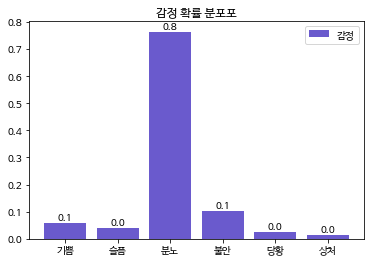

tensor([[0.0569, 0.0399, 0.7641, 0.1027, 0.0236, 0.0128]])
분노 --


문장을 입력해주세요: 난 왜 이런걸까..


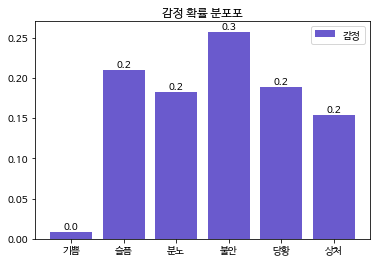

tensor([[0.0086, 0.2094, 0.1823, 0.2572, 0.1888, 0.1536]])
불안... ㄷㄷㄷ




KeyboardInterrupt: ignored

In [ ]:
def sentence_predict(sent):
    # 평가모드로 변경
    model.eval()

    # 입력된 문장 토크나이징
    tokenized_sent = tokenizer(
        sent,
        return_tensors="pt",
        truncation=True,
        add_special_tokens=True,
        max_length=128
    )

    # 모델이 위치한 GPU로 이동
    tokenized_sent.to(device)

    # 예측
    with torch.no_grad():
        outputs = model(
            input_ids = tokenized_sent["input_ids"],
            attention_mask=tokenized_sent["attention_mask"],
            token_type_ids=tokenized_sent["token_type_ids"]
        )

    # 결과 return
    logits = outputs[0]
    logits = logits.detach().cpu()
    prob = logits.softmax(dim=1)
    x = ['기쁨', '슬픔', '분노', '불안', '당황', '상처']
    y = [prob[0][0], prob[0][1], prob[0][2],prob[0][3],prob[0][4],prob[0][5]]

    bar = plt.bar(x,y,color='slateblue')
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)
    plt.title('감정 확률 분포포')
    plt.legend(['감정'])
    plt.show()

    print(prob)
    result = logits.argmax(-1)
    if result == 0:
        result = "기쁨 ㅎㅎ"
    elif result == 1:
        result = "슬픔 ㅠㅠ"
    elif result == 2:
        result = "분노 --"
    elif result == 3: 
        result = "불안... ㄷㄷㄷ"
    elif result == 4:
        result = "당황?!"
    elif result == 5:
        result = "상처...ㅠㅠㅠ"
    return result

#0 입력시 종료
while True:
     sentence = input("문장을 입력해주세요: ")
     if sentence == "0": 
         break
     print(sentence_predict(sentence))
     print("\n")
    